In [167]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/in-vehicle-coupon-recommendation.csv")

In [168]:
df.info()
df.head()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


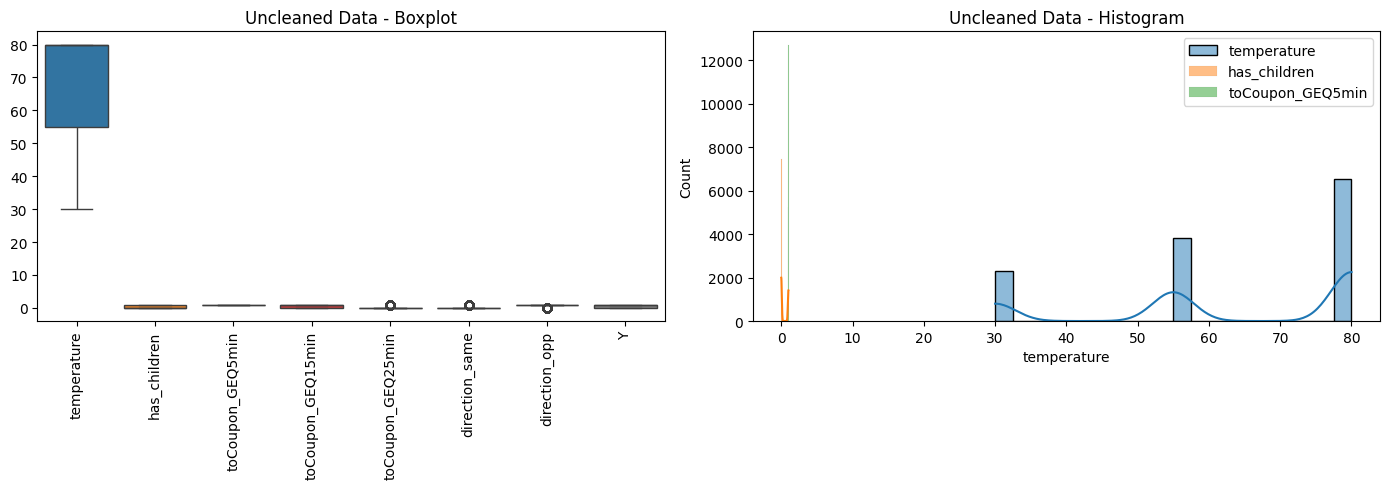

In [169]:
# Uncleaned Data
df_uncleaned=df.copy()
numerical_cols=df_uncleaned.select_dtypes(include=["int64", "float64"]).columns

fig,axes=plt.subplots(1,2,figsize=(14, 5))

# Boxplot for Uncleaned Data
sns.boxplot(data=df_uncleaned[numerical_cols],ax=axes[0])
axes[0].set_title("Uncleaned Data - Boxplot")
axes[0].tick_params(axis='x', rotation=90)

# Histogram for Uncleaned Data
for col in numerical_cols[:3]:  # Limiting to first 3 numerical columns for clarity
    sns.histplot(df_uncleaned[col],bins=20,ax=axes[1],kde=True, label=col)

axes[1].set_title("Uncleaned Data - Histogram")
axes[1].legend()

plt.tight_layout()
plt.show()

In [170]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


In [171]:
(df.isnull().sum() / df.shape[0]) * 100

,0
destination,0.000000
passanger,0.000000
weather,0.000000
temperature,0.000000
time,0.000000
coupon,0.000000
expiration,0.000000
gender,0.000000
age,0.000000
maritalStatus,0.000000


In [172]:
#ensuring age contains numerical values only
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df["age"] = df["age"].fillna(df["age"].median())


In [173]:
#coloumn car has a lot of null values than non null values, so drop it
df.drop(columns=['car'], inplace=True)

In [174]:
#putting values inside null values by grouping using income coulmn since we i found some similarities between the income vs other coloumns
for col in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    df[col] = df.groupby('income')[col].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "unknown"))

#remaining missing values with mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-174-2e8f1a0e45ec>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [175]:
#Convert Categorical Text to Lowercase
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower().str.strip()

In [176]:
#only 1 unique value found
df.drop(columns=["toCoupon_GEQ5min"], inplace=True)

In [177]:
#remove duplicate rows from the data
df.drop_duplicates(inplace=True)


In [178]:
#Convert Categorical Columns to Category Type
categorical_cols = [
    "destination", "passanger", "weather", "time", "coupon", "expiration",
    "gender", "age", "maritalStatus", "education", "occupation", "income",
    "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"
]

for col in categorical_cols:
    df[col] = df[col].astype("category")


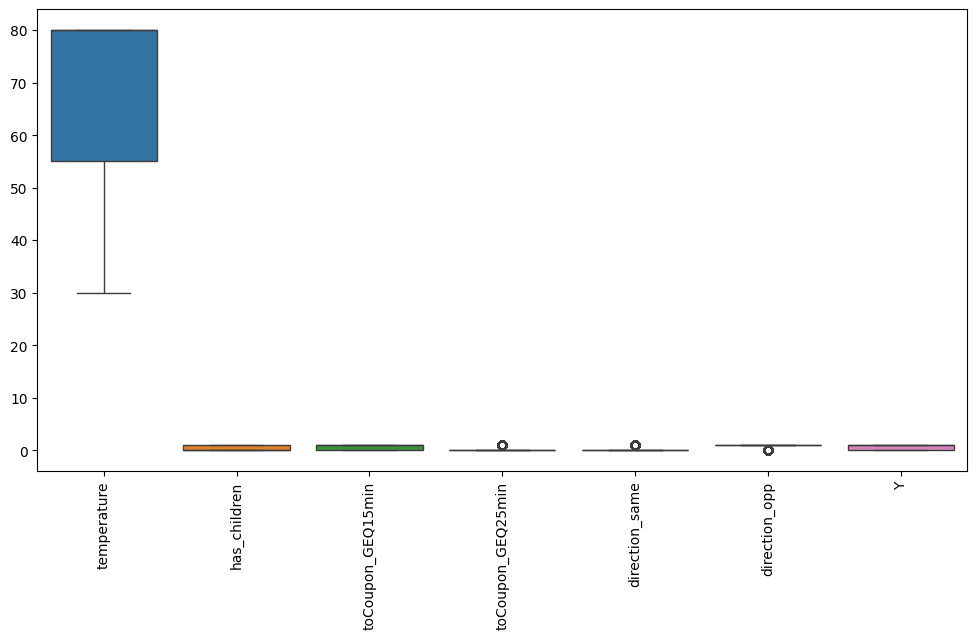

In [179]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.show()


In [180]:
# Apply outlier removal
def detect_and_remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Select numerical columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Apply outlier removal
df = detect_and_remove_outliers_iqr(df, numerical_cols)

# Display shape before & after
print("Dataset shape after outlier removal:", df.shape)

# Check if any outliers were removed
print({col: df[col].isna().sum() for col in ["age", "toCoupon_GEQ25min", "direction_same", "direction_opp"]})


Dataset shape after outlier removal: (8429, 24)
{'age': np.int64(0), 'toCoupon_GEQ25min': np.int64(0), 'direction_same': np.int64(0), 'direction_opp': np.int64(0)}


In [181]:
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = scaler.fit_transform(df[num_cols])


In [182]:
#changing the value of all the married people to 1 and singles to 0
df['maritalStatus'] = df['maritalStatus'].replace({'Married partner': 1, 'Married': 1, 'Unmarried partner': 0, 'Single': 0, 'Divorced': 0, 'Widowed': 0, 'Never married': 0})

In [183]:
df.to_csv("cleaned_data.csv", index=False)


In [184]:
#final data analysis
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***" * 10)


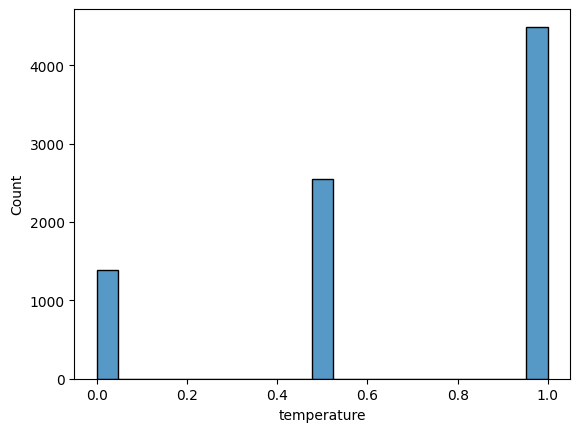

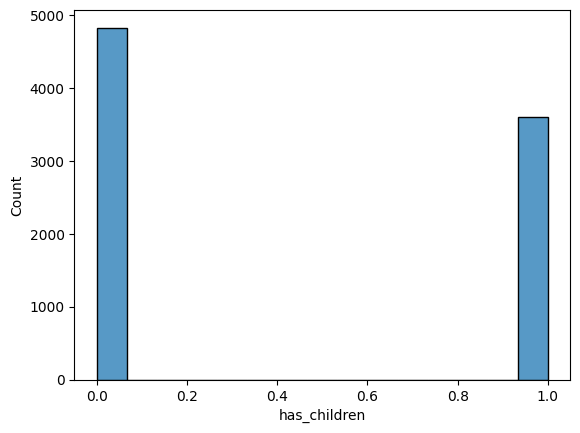

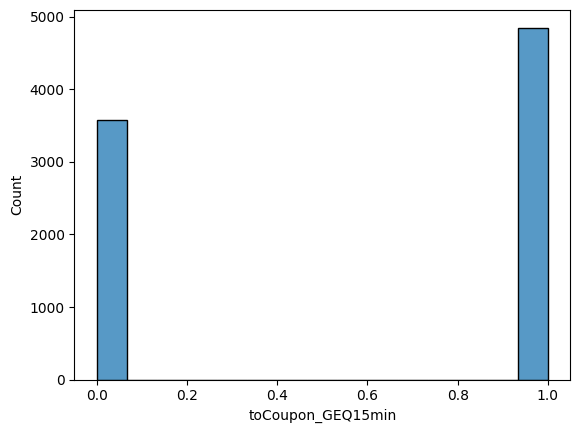

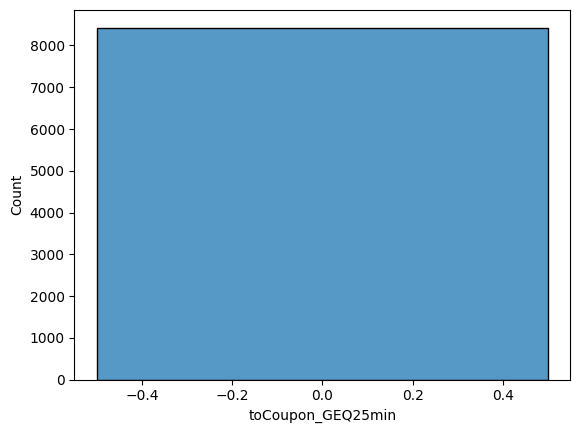

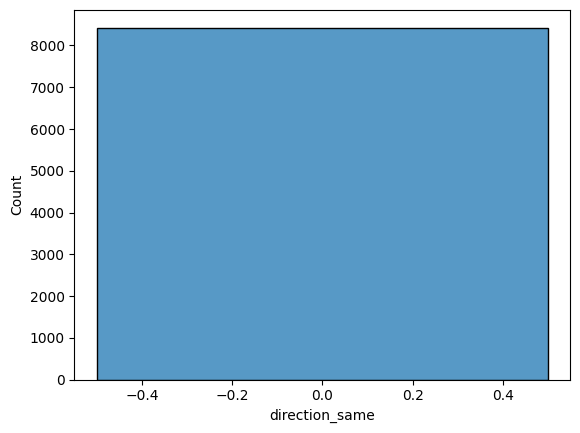

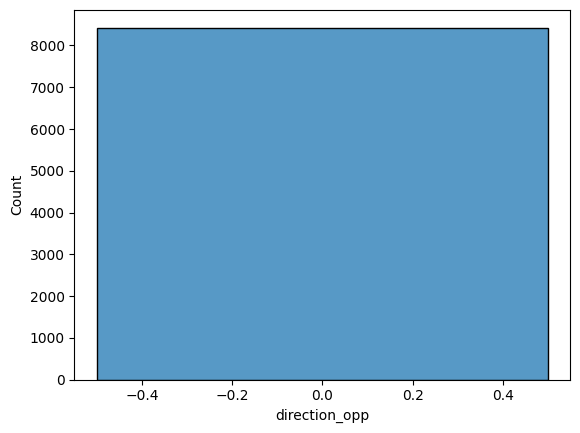

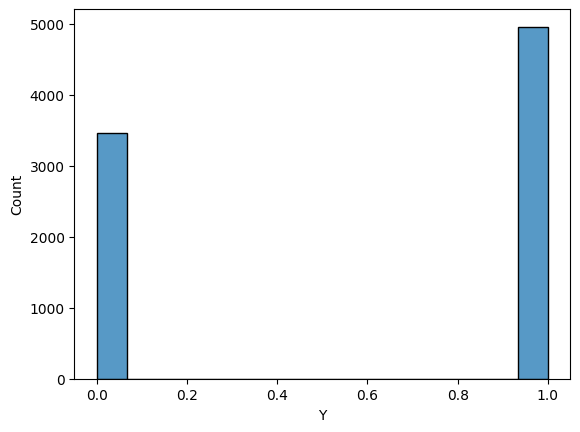

In [185]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()


In [186]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,no urgent place,alone,sunny,0.5,2pm,restaurant(<20),1d,female,21.0,unmarried partner,...,never,never,4~8,4~8,1~3,0.0,0.0,0.0,0.0,1.0
1,no urgent place,friend(s),sunny,1.0,10am,coffee house,2h,female,21.0,unmarried partner,...,never,never,4~8,4~8,1~3,0.0,0.0,0.0,0.0,0.0
2,no urgent place,friend(s),sunny,1.0,10am,carry out & take away,2h,female,21.0,unmarried partner,...,never,never,4~8,4~8,1~3,1.0,0.0,0.0,0.0,1.0
3,no urgent place,friend(s),sunny,1.0,2pm,coffee house,2h,female,21.0,unmarried partner,...,never,never,4~8,4~8,1~3,1.0,0.0,0.0,0.0,0.0
4,no urgent place,friend(s),sunny,1.0,2pm,coffee house,1d,female,21.0,unmarried partner,...,never,never,4~8,4~8,1~3,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12670,no urgent place,partner,rainy,0.5,6pm,bar,2h,male,26.0,single,...,never,never,1~3,4~8,1~3,1.0,0.0,0.0,0.0,0.0
12671,no urgent place,partner,snowy,0.0,10am,restaurant(<20),1d,male,26.0,single,...,never,never,1~3,4~8,1~3,0.0,0.0,0.0,0.0,1.0
12673,home,alone,sunny,0.0,6pm,carry out & take away,1d,male,26.0,single,...,never,never,1~3,4~8,1~3,0.0,0.0,0.0,0.0,0.0
12675,home,alone,snowy,0.0,10pm,coffee house,2h,male,26.0,single,...,never,never,1~3,4~8,1~3,1.0,0.0,0.0,0.0,0.0


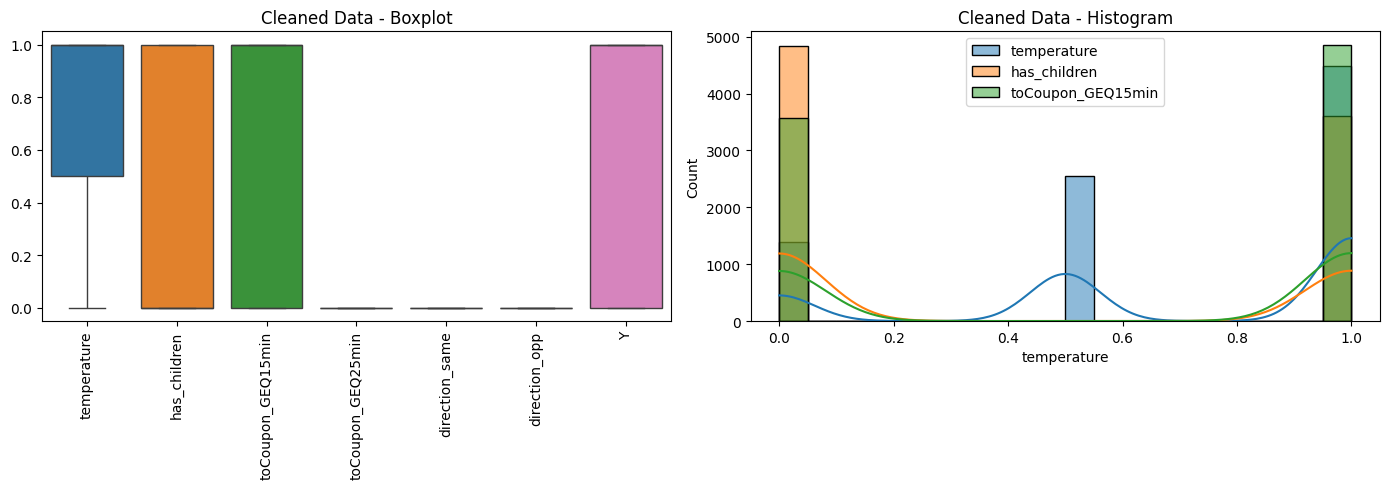

In [187]:
# Cleaned Data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot for Cleaned Data
sns.boxplot(data=df[numerical_cols], ax=axes[0])
axes[0].set_title("Cleaned Data - Boxplot")
axes[0].tick_params(axis='x', rotation=90)

# Histogram for Cleaned Data
for col in numerical_cols[:3]:  # Keeping same 3 columns for a fair comparison
    sns.histplot(df[col], bins=20, ax=axes[1], kde=True, label=col)

axes[1].set_title("Cleaned Data - Histogram")
axes[1].legend()

plt.tight_layout()
plt.show()